In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = [5, 5]
%config InlineBackend.figure_format='retina'

## Part 1

In [2]:
np.random.seed(42)
N=10
mu_true = 1
sigma = 0.2
xi = stats.norm(mu_true, sigma).rvs(N)

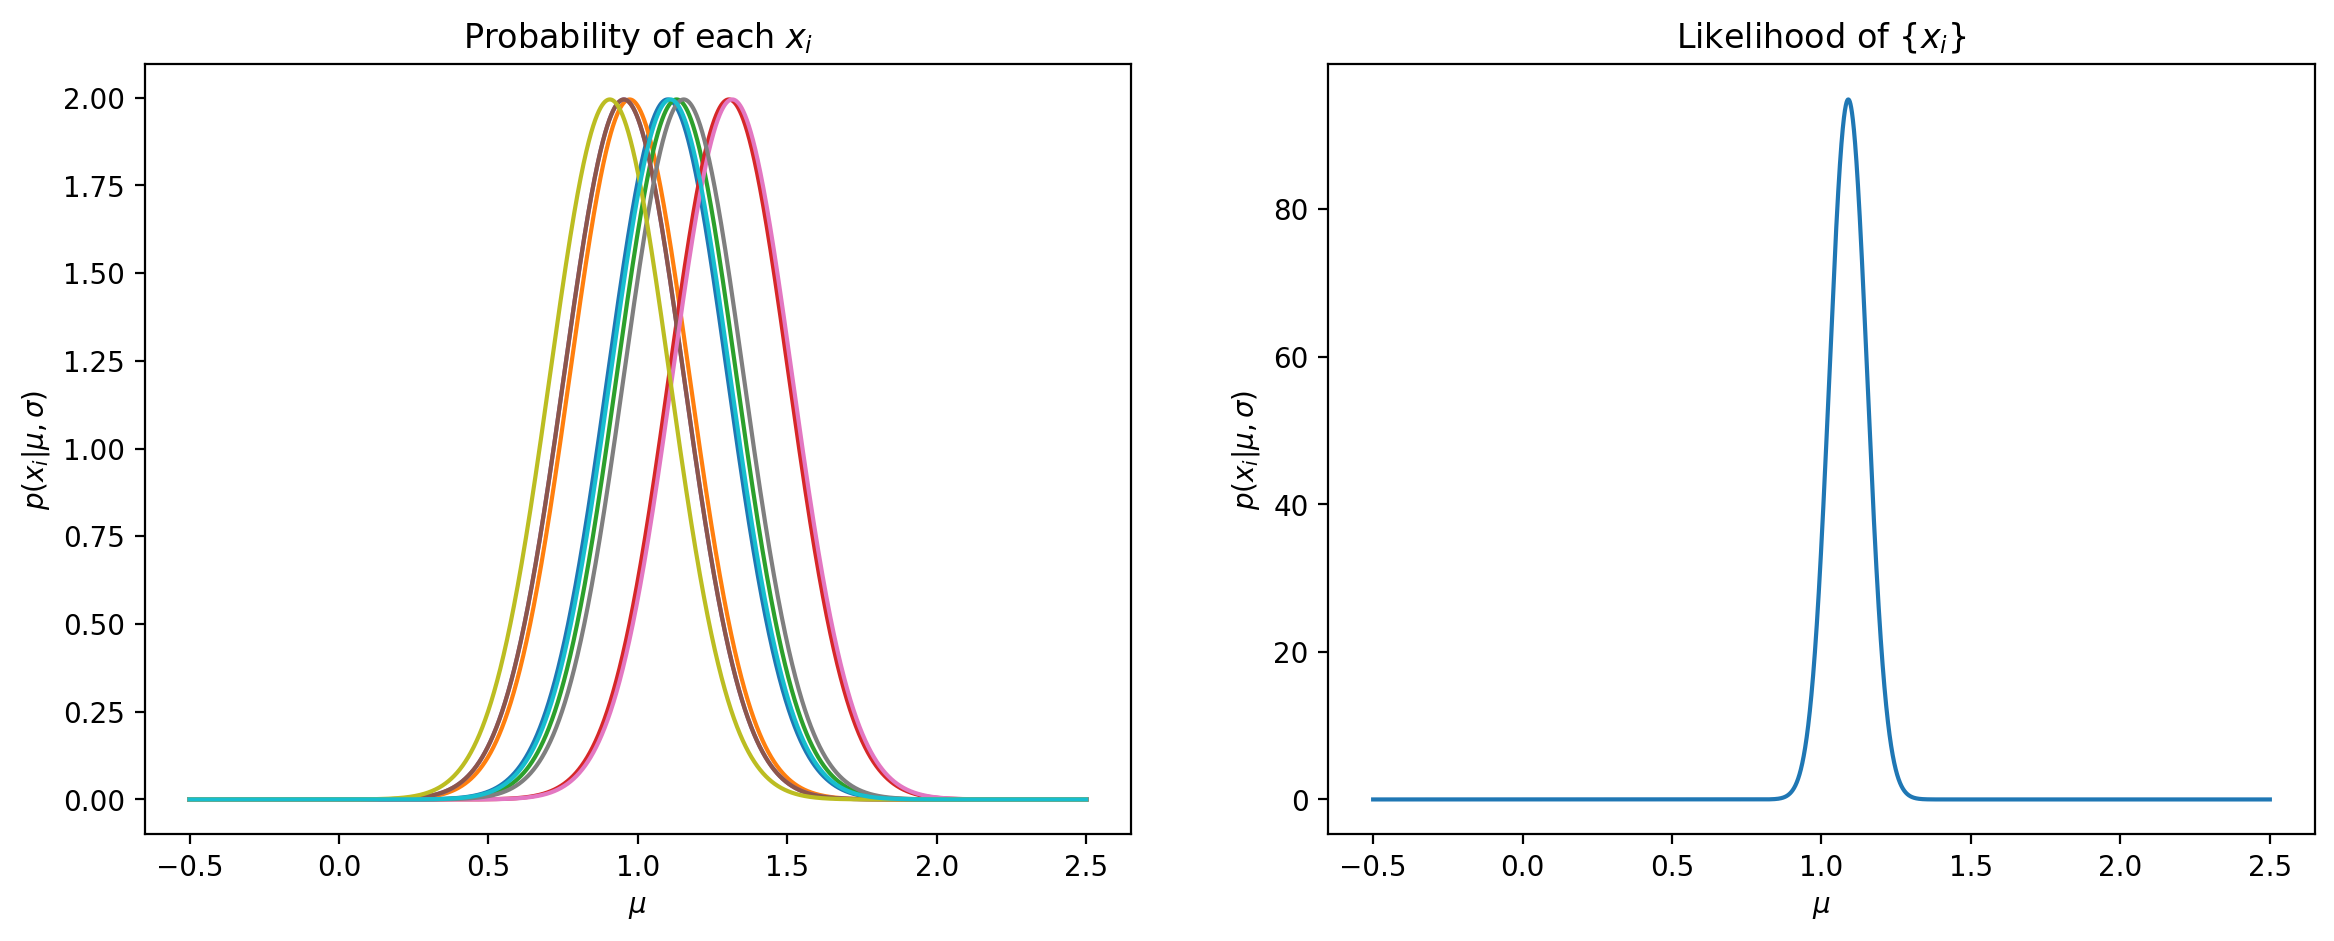

Maximum of the Likelihood =  1.0895589558955896
Sample mean =  1.0896122223397513


In [3]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

xgrid = np.linspace(-0.5, 2.5, 10000)

for mu in xi:
    axs[0].plot(xgrid, stats.norm(mu, 0.2).pdf(xgrid))
axs[0].set_xlabel('$\mu$')
axs[0].set_ylabel(r'$p(x_i | \mu,\sigma)$')
axs[0].set_title('Probability of each $x_i$')

L = np.prod([stats.norm(mu, 0.2).pdf(xgrid) for mu in xi] , axis=0)
axs[1].set_xlabel('$\mu$')
axs[1].set_ylabel(r'$p(x_i | \mu,\sigma)$')
axs[1].plot(xgrid, L)
axs[1].set_title('Likelihood of {$x_i$}')
plt.show()

MLE = xgrid[np.argsort(L)[-1]]
mean = np.mean(xi)
print('Maximum of the Likelihood = ', MLE)
print('Sample mean = ', mean)


## Part 2

In [4]:
logL = np.log(L)
d2_logL = np.diff(logL,2)[0] 
#because it's the second order differentation of a parabola so all the discrete differences are the same

dtheta2 = (xgrid[1] - xgrid[0])**2 #because they are all equally separated
F = (-d2_logL)/(dtheta2)
MLE_err = (1/F)**(0.5)
mean_err = sigma/(N**0.5)
print('Fisher matrix error =', MLE_err)
print('Uncertainty of the sample mean =', mean_err)

Fisher matrix error = 0.06324555334017737
Uncertainty of the sample mean = 0.06324555320336758


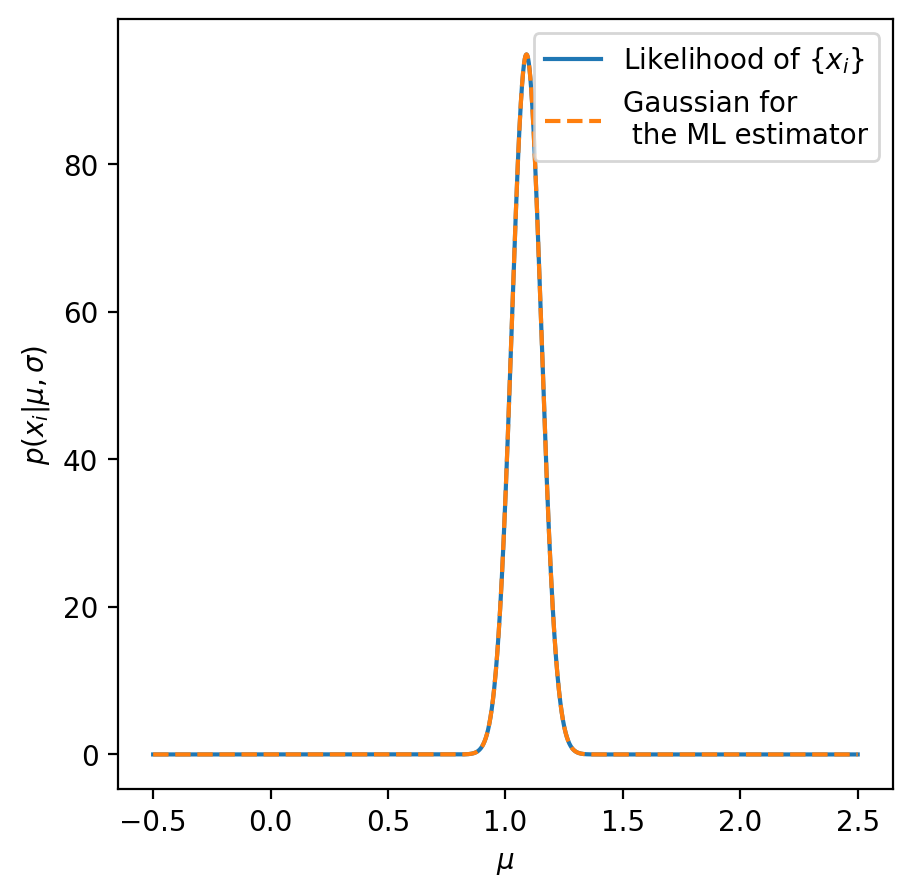

In [5]:
newG = stats.norm(MLE, MLE_err).pdf(xgrid)
plt.plot(xgrid, L, label='Likelihood of {$x_i$}')
max1 = np.max(L)
max2 = np.max(newG)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i | \mu,\sigma)$')
plt.plot(xgrid, (max1/max2)*newG, ls='--',label='Gaussian for \n the ML estimator')
plt.legend(loc='upper right')
plt.show()

## Part 3

In [6]:
def ML(xi,sigmai):
    xgrid=np.linspace(-0.5,2.5,10000)
    L = np.prod([stats.norm(mu, sigma).pdf(xgrid) for mu,sigma in zip(xi,sigmai)] , axis=0)
    MLE = xgrid[np.argsort(L)[-1]]
    logL = np.log(L)
    d2_logL = np.diff(logL,2)
    dtheta2 = (xgrid[1] - xgrid[0])**2
    F = (-d2_logL)/(dtheta2)
    MLerr = (1/F[0])**(0.5)
    return MLE, MLerr

In [7]:
# I check that it returns the same values found before for the homoscedastic case
print('Maximum of the Likelihood = ',ML(xi,np.full(10,sigma))[0])
print('Fisher matrix error = ',ML(xi,np.full(10,0.2))[1])

Maximum of the Likelihood =  1.0895589558955896
Fisher matrix error =  0.06324555334017737


In [8]:
# Heteroscedastic case
sigmai = stats.norm(0.2,0.05).rvs(N)
new_xi = np.array([stats.norm(mu,sigma).rvs(1) for sigma in sigmai]).flatten()

print('Maximum of the Likelihood = ',ML(new_xi,sigmai)[0])
print('Fisher matrix error = ',ML(new_xi,sigmai)[1])
print('\n')

w = 1/(sigmai**2)
print('Weighted mean = ', np.average(new_xi,weights=w))
print('Uncertainty of the sample mean = ',(np.sum(w))**(-0.5))

Maximum of the Likelihood =  1.0592559255925593
Fisher matrix error =  0.046772184074155086


Weighted mean =  1.059135676315776
Uncertainty of the sample mean =  0.04677218410313741
